In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

from scipy import optimize, stats

In [2]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)


COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Load tables

In [3]:
DIR = '/scratch/midway3/dhayaa/SHEARTESTS_20240504/NPATCH_100/'

----------FULL BMODE----------
P-val: 0.28204915289030064
Chi2, Chi2/ndof: 23.138417903560864 1.1569208951780432
--------------------------------


----------BMODE w/ FIRST POINT REMOVED----------
P-val: 0.5334116282167274
Chi2, Chi2/ndof: 18.82215663950292 0.941107831975146
--------------------------------




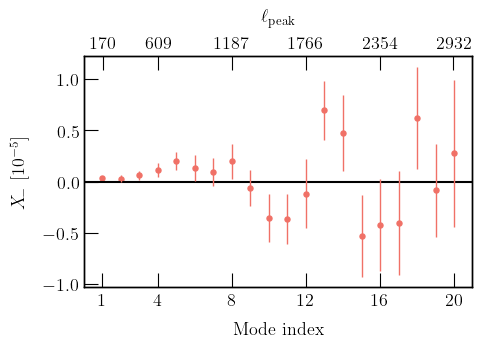

In [7]:
plt.figure(figsize = (5,3))

plt.axhline(0, color ='k')

B   = np.load(DIR + '/MRBmode_B.npy')
Cov = np.load(DIR + '/MRBmode_B_Cov.npy')

res = B

NJK = 100
hartlap  = ((NJK - 20 - 2) / (NJK -  1))
dodelson = 1 / (1 + (20 - 3) * (NJK - 20 - 2) / (NJK - 20 - 1) / (NJK - 20 - 4) )

inv = np.linalg.inv(Cov) * hartlap * dodelson
chi2 = res @ inv @ res

print("----------FULL BMODE----------")
print("P-val:", 1 - stats.chi2(df = len(res)).cdf(chi2))
print("Chi2, Chi2/ndof:", chi2, chi2/len(res))
print("--------------------------------\n\n")


inv = np.linalg.inv(Cov[1:].T[1:]) * hartlap * dodelson
chi2 = res[1:] @ inv @ res[1:]

print("----------BMODE w/ FIRST POINT REMOVED----------")
print("P-val:", 1 - stats.chi2(df = len(res)).cdf(chi2))
print("Chi2, Chi2/ndof:", chi2, chi2/len(res))
print("--------------------------------\n\n")


# ax.flatten()[0].scatter(x[:, 0], 1/cc[0]*np.abs(x[:, 3]), s=13, color = COLORS[0], label = 'Data')
# ax.flatten()[0].errorbar(x[:, 0], 1/cc[0]*np.abs(x[:, 3]), yerr = 1/cc[0]*x[:, 7], fmt = 'none', color = COLORS[0], lw = 0, elinewidth = 1)

plt.scatter(np.arange(20) + 1 , B * 1e5, s=13, color = COLORS[0])
plt.errorbar(np.arange(20) + 1 , B * 1e5, yerr = np.sqrt(np.diagonal(Cov))  * 1e5, fmt = 'none', color = COLORS[0], lw = 0, elinewidth = 1)

ticks = [1, 4, 8, 12, 16, 20]
plt.xticks(ticks, ticks)
plt.ylabel(r'$X_{\!-}$  [$10^{-5}$]', size = 13, labelpad = 10)
plt.xlabel('Mode index', size = 13, labelpad = 10)

COEFF = np.load('/scratch/midway3/dhayaa/EB_Coefficients_N20.npy', allow_pickle = True)

ax2 = plt.gca().twiny()
ax2.set_xticks(ticks)
ax2.set_xticklabels([int(COEFF[i - 1][3][np.argmax(np.abs(COEFF[i - 1][4]))]) for i in ticks])
ax2.set_xlim(0, 21)
ax2.set_xlabel(r'$\ell_{\rm peak}$', size = 13, labelpad = 10)
del COEFF

plt.savefig('./Bmode.pdf', dpi = 300, bbox_inches = 'tight')

# Plot the mode weights just to check

1 170
4 609
8 1187
12 1766
16 2354
20 2932


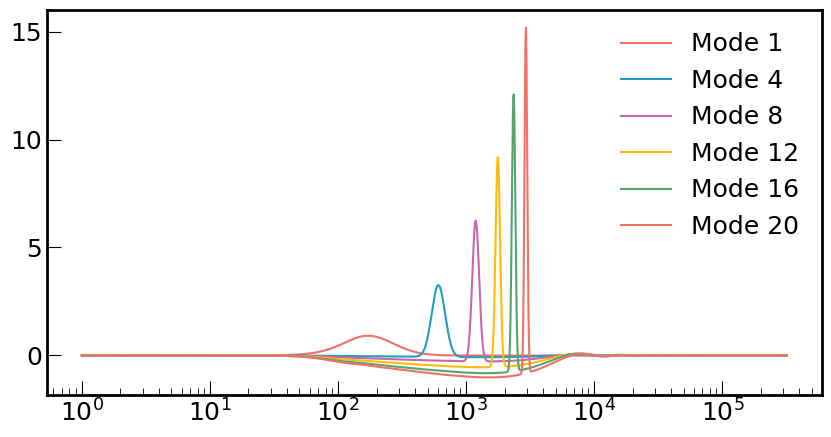

In [68]:
plt.figure(figsize = (10, 5))
plt.xscale('log')

COEFF = np.load('/scratch/midway3/dhayaa/EB_Coefficients_N20.npy', allow_pickle = True)

for i in ticks:
    plt.plot(COEFF[i - 1][3], COEFF[i - 1][4], label = f'Mode {i}')
    
    ell_peak = int(COEFF[i - 1][3][np.argmax(np.abs(COEFF[i - 1][4]))])
    
    print(i, ell_peak)
    
plt.legend()